In [ ]:
from dataclasses import dataclass, field
from Ranking_exp import Ranking_exp
import numpy as np
import matplotlib.pyplot as plt
import math

@dataclass
class params:
    n_array: list
    p_array: list
    q_array: list
    n: int
    p: int
    q: int

    alpha = 1 - (2 * ((k_o - k_d)/(k_s - k_d)))
    alpha_eff = (alpha + 1/c_reg)/(1+(1/c_reg))

# all values are 1 indexed
def create_pq(n, middle, leftLen, rightLen):
    middle = math.ceil(n / 2) 
    p = int(middle + rightLen)
    q = int(middle - leftLen)
    return p, q

Initial ranks

C:\Users\lukel\AppData\Local\Temp\ipykernel_118164\1638868578.py:10: RuntimeWarning: divide by zero encountered in divide
  c_vals = 1/(c_var_vals * delta_s)


[        inf 33.33333333 16.66666667 11.11111111  8.33333333  6.66666667
  5.55555556  4.76190476  4.16666667  3.7037037   3.33333333  3.03030303
  2.77777778  2.56410256  2.38095238  2.22222222  2.08333333  1.96078431
  1.85185185  1.75438596  1.66666667  1.58730159  1.51515152  1.44927536
  1.38888889  1.33333333  1.28205128  1.2345679   1.19047619  1.14942529
  1.11111111  1.07526882  1.04166667  1.01010101]


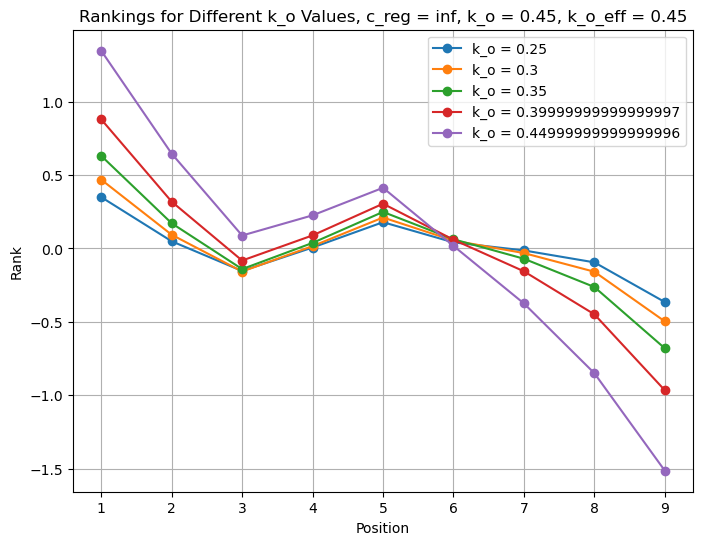

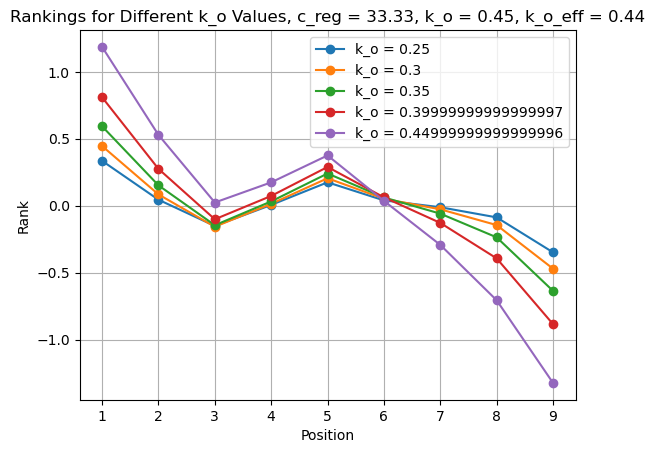

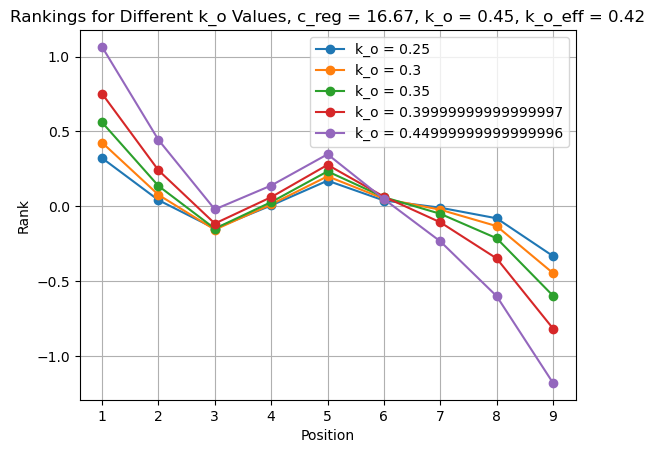

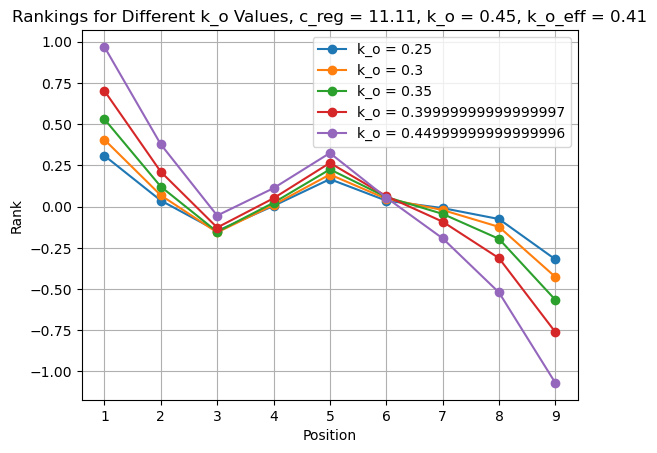

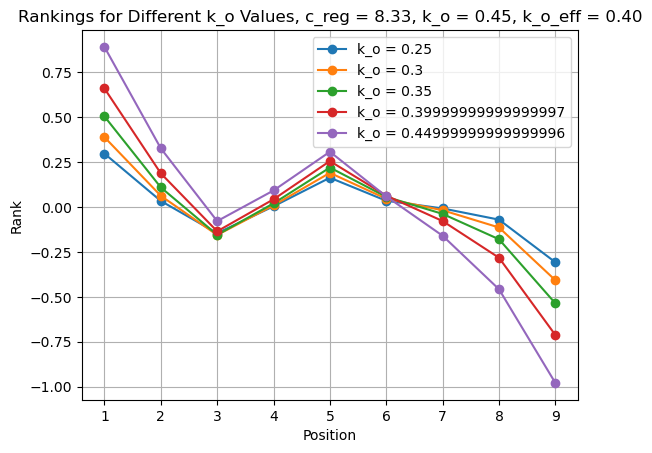

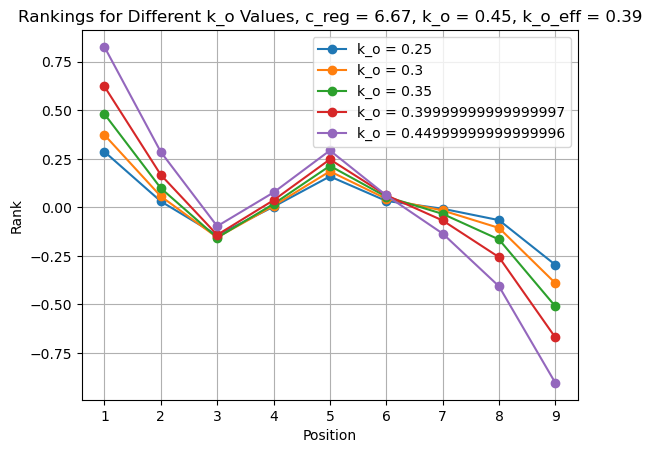

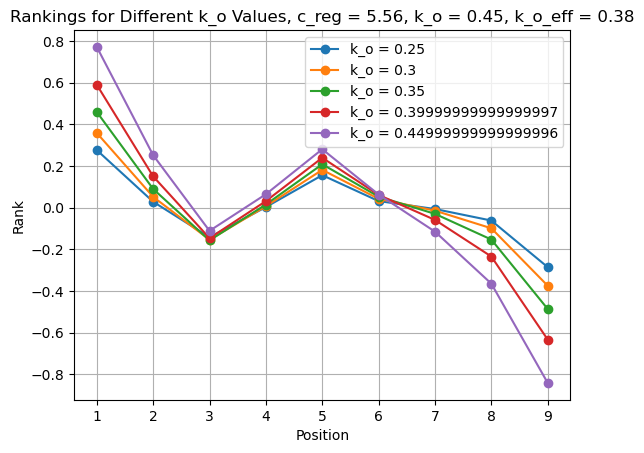

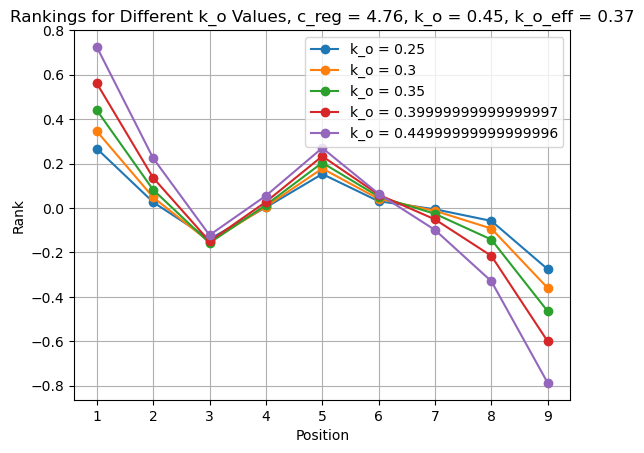

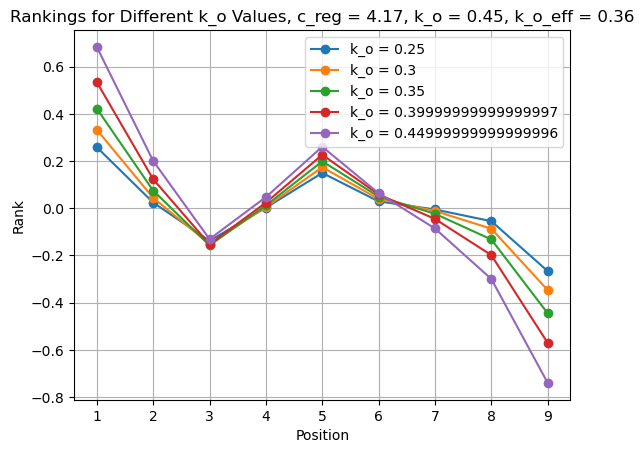

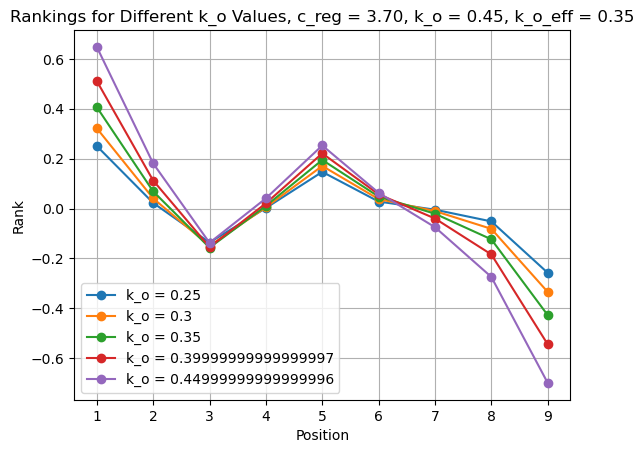

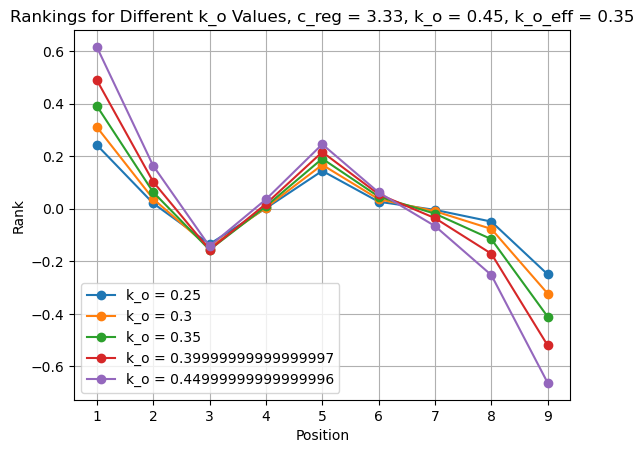

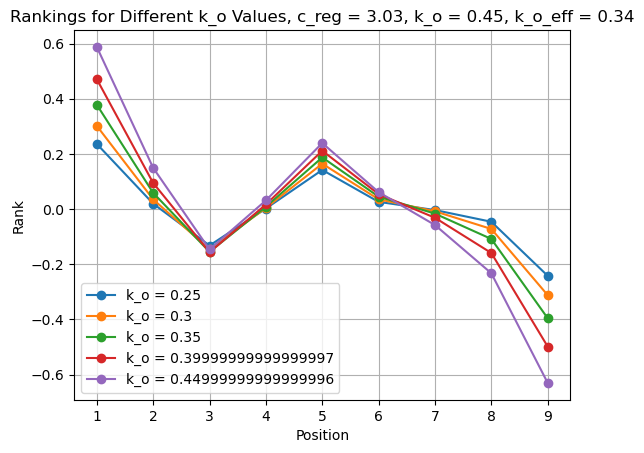

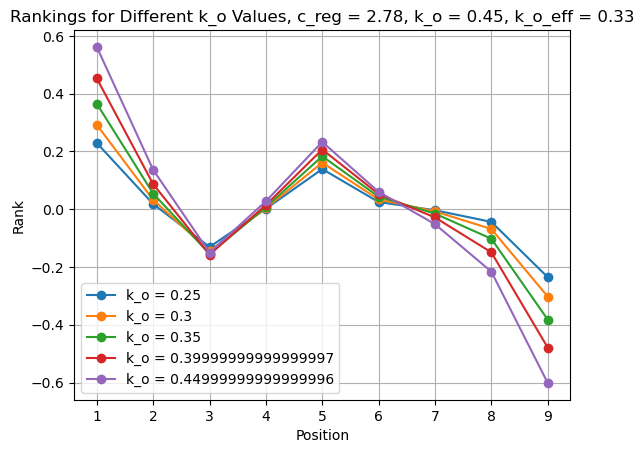

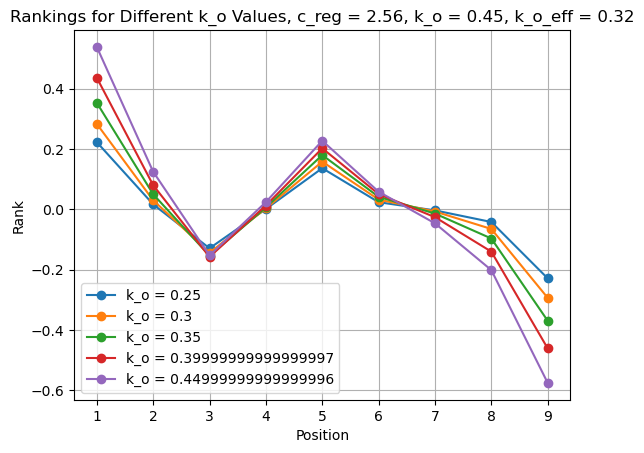

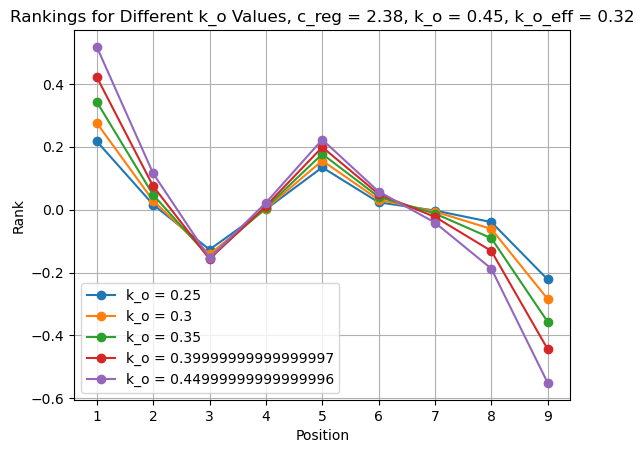

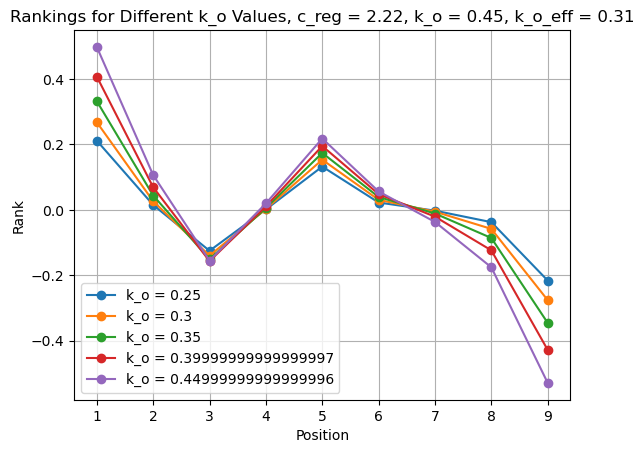

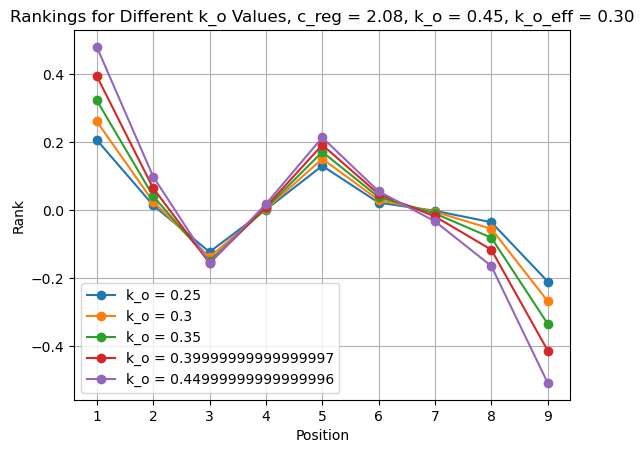

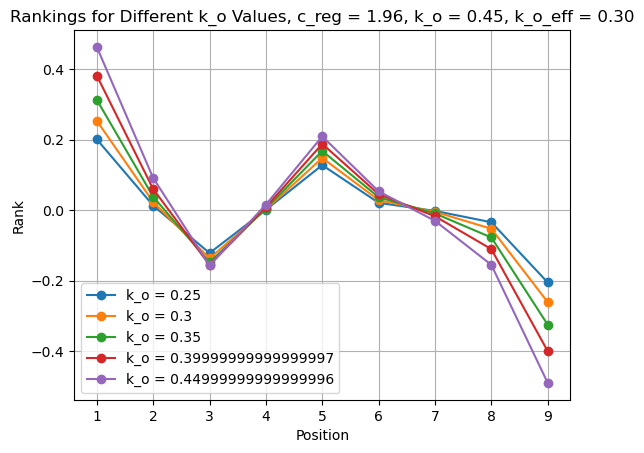

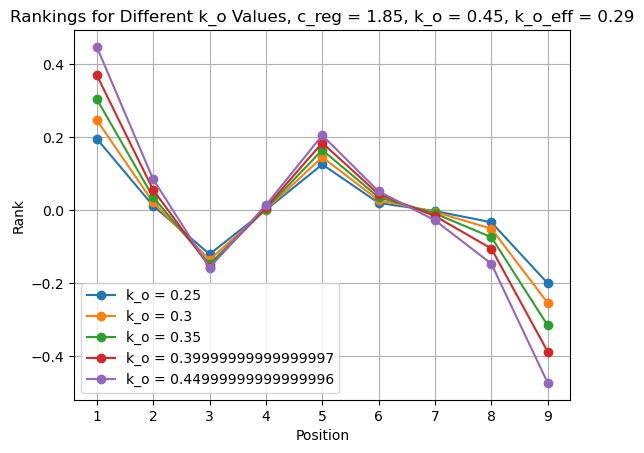

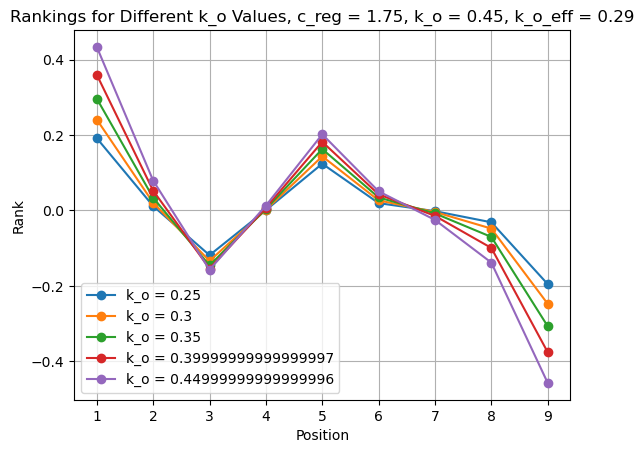

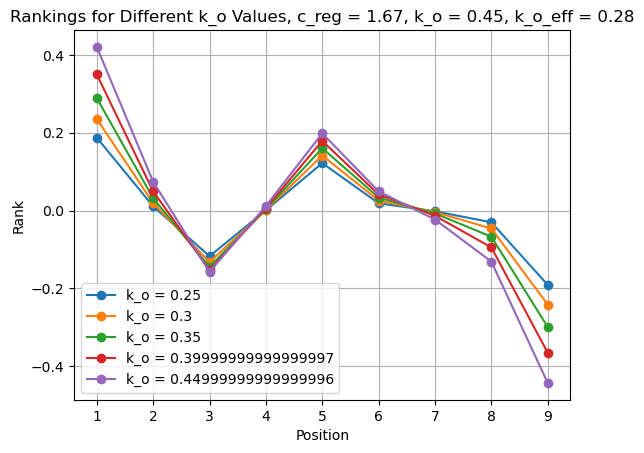

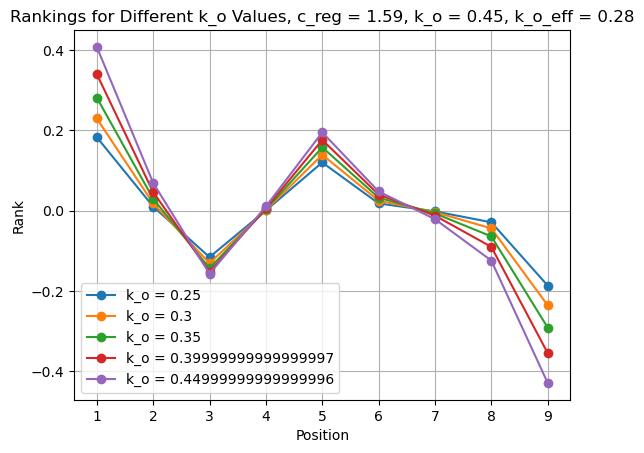

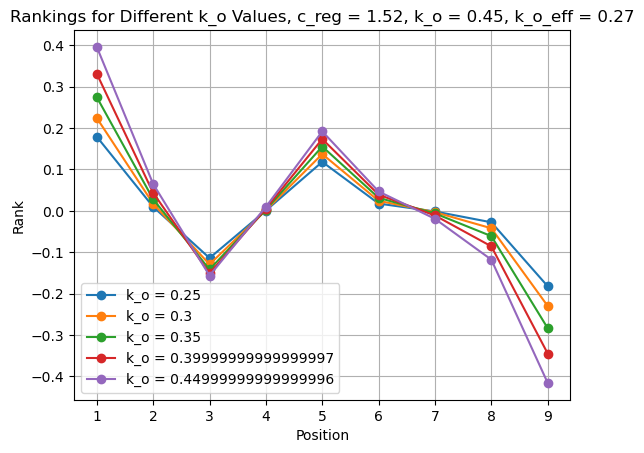

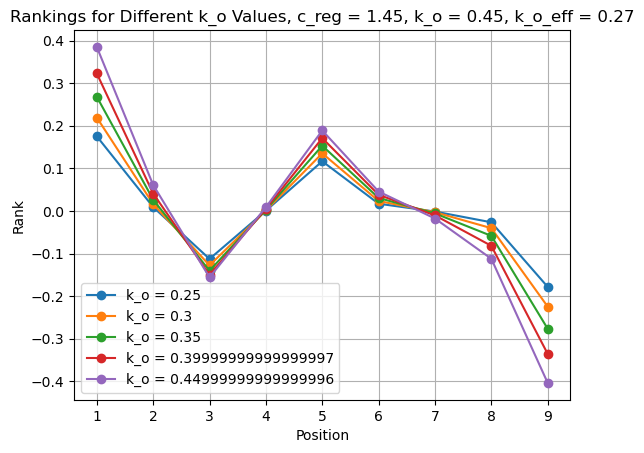

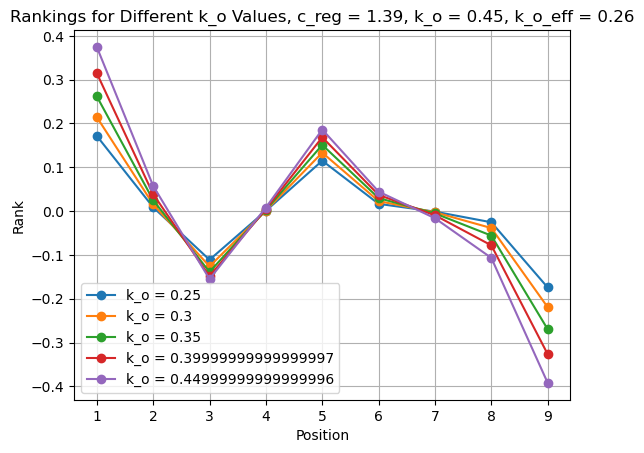

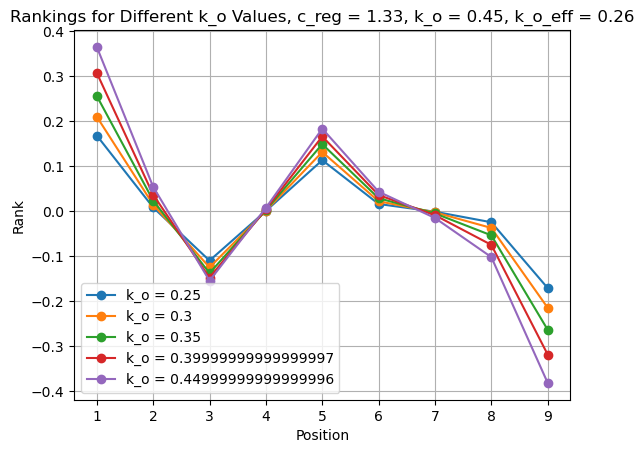

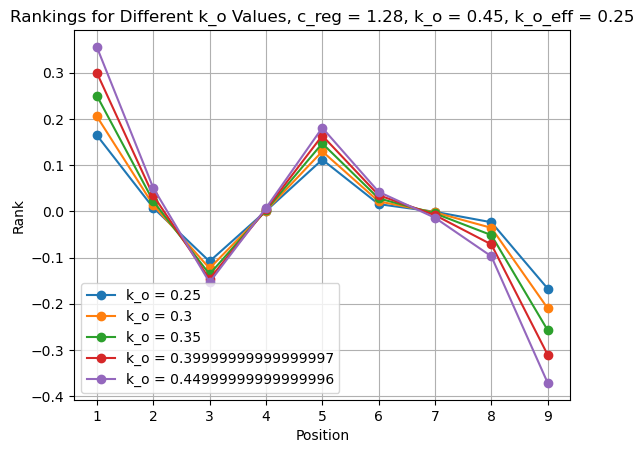

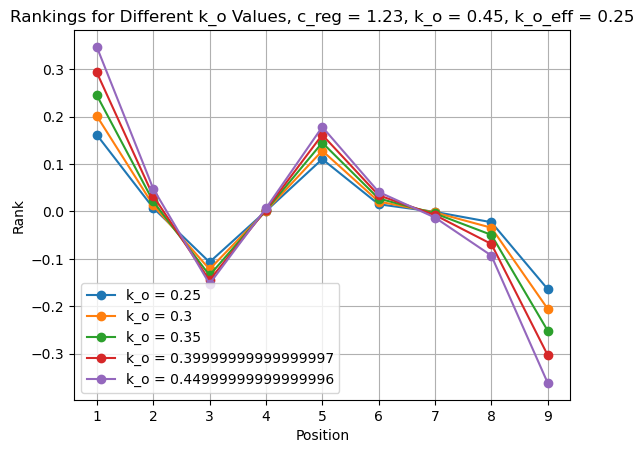

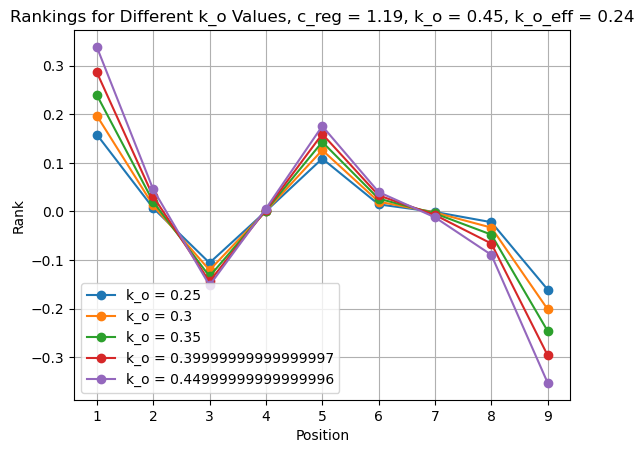

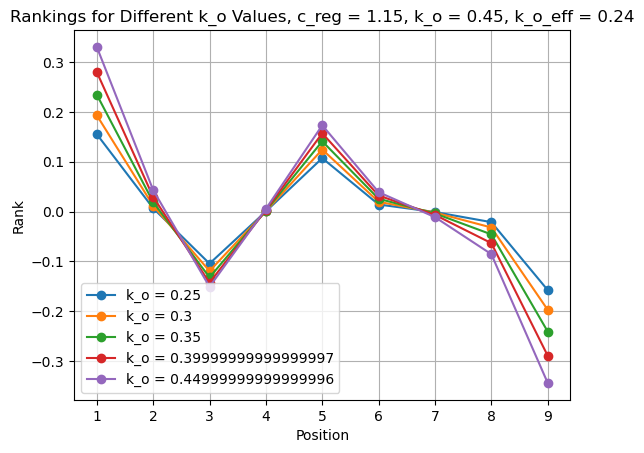

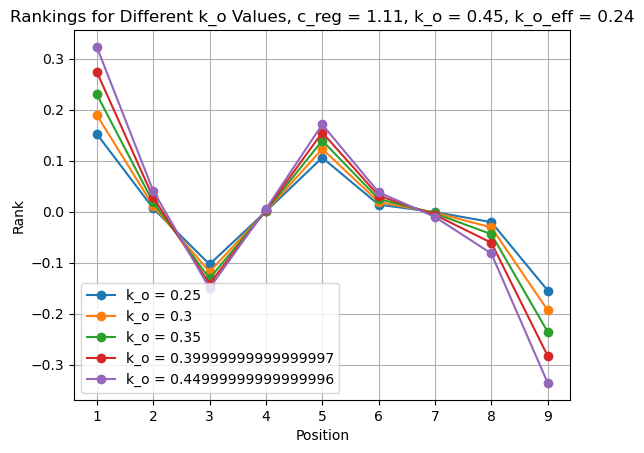

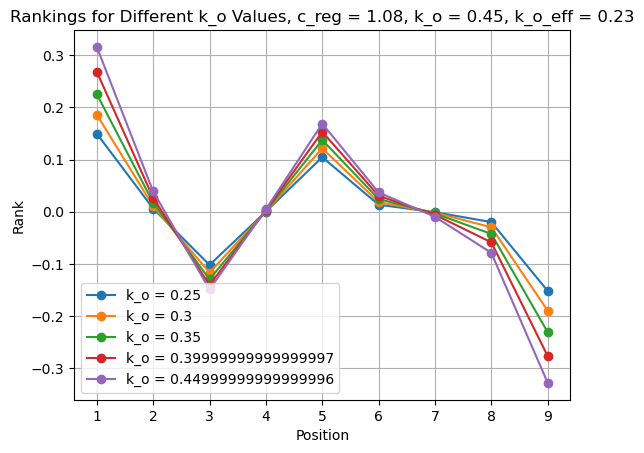

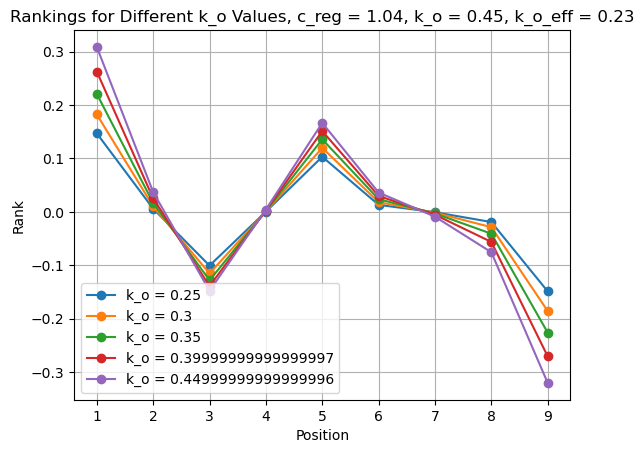

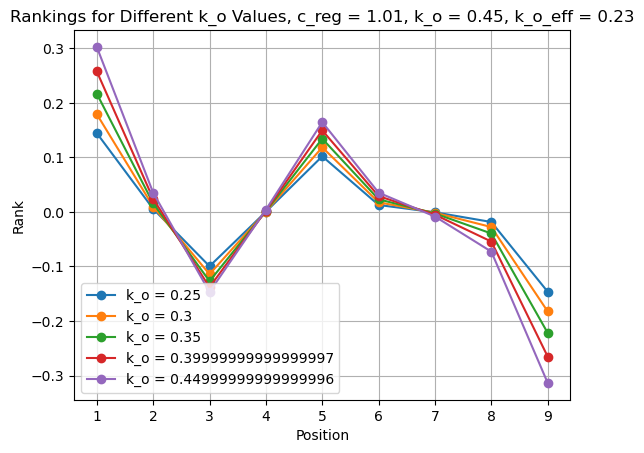

In [22]:
# Set parameters
n = 9
p = 6
q = 4
k_o_vals = np.arange(0.25, 0.499, 0.05)
k_s = 1
k_d = 0
delta_s = k_s - k_d  
c_var_vals = np.arange(0, 1, 0.03)
c_vals = 1/(c_var_vals * delta_s)
print(c_vals)

# Single plot for all k_o values
plt.figure(figsize=(8, 6))
x_vals = np.arange(1, n + 1)

for c_reg in c_vals:

    for k_o in k_o_vals:
        alpha = 1 - (2 * ((k_o - k_d)/(k_s - k_d)))
        alpha_eff = (alpha + 1/c_reg)/(1+(1/c_reg)) 
        k_o_eff = (alpha_eff * (k_s-k_d) - k_s - 2*k_d) / -2
        # Create simulation
        sim = Ranking_exp(n=n, k_o=k_o, k_s=k_s, k_d=k_d, p=5, q=3, c_reg=c_reg)
        ranks = sim.calc_rank_analytic()
        
        # Plot for this k_o
        plt.plot(x_vals, ranks, marker='o', label=f'k_o = {k_o}')
        
        # Print the ranks
        # print(f"\nRanks for k_o = {k_o}:")
        # for i, rank in enumerate(ranks, 1):
        #     print(f"Position {i}: {rank}")

    plt.title(f'Rankings for Different k_o Values, c_reg = {c_reg:.2f}, k_o = {k_o:.2f}, k_o_eff = {k_o_eff:.2f}')
    plt.xlabel('Position')
    plt.ylabel('Rank')
    plt.grid(True)
    plt.xticks(np.arange(1, n + 1))
    plt.legend()
    plt.show()



Testing if k_o eff is the same

- [x] yes it is

C:\Users\lukel\AppData\Local\Temp\ipykernel_118164\492209973.py:10: RuntimeWarning: divide by zero encountered in divide
  c_vals = 1/(c_var_vals * delta_s)


[        inf 20.         10.          6.66666667  5.          4.
  3.33333333  2.85714286  2.5         2.22222222  2.          1.81818182
  1.66666667  1.53846154  1.42857143  1.33333333  1.25        1.17647059
  1.11111111  1.05263158]
k_o_eff = 0.2261194029850746


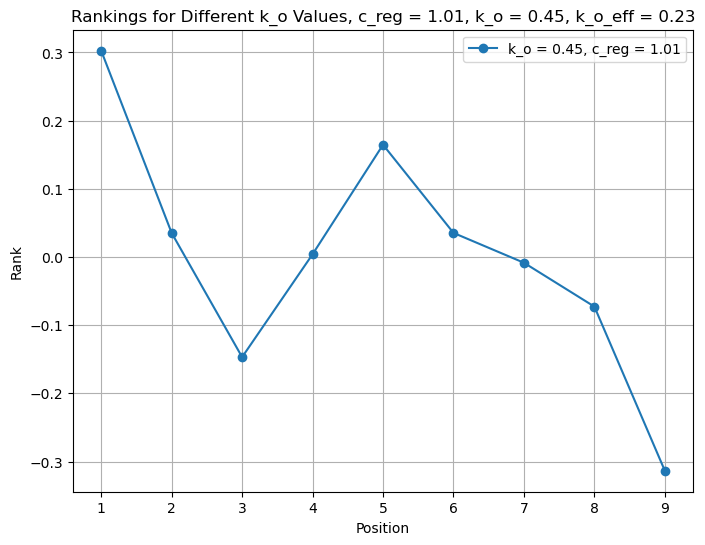

k_o_eff = 0.2261194029850746


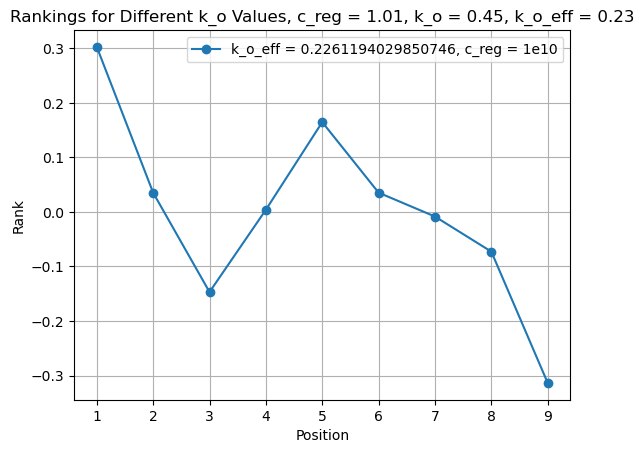

In [35]:
# Set parameters
n = 9
p = 6
q = 4
k_o_vals = np.arange(0.25, 0.499, 0.05)
k_s = 1
k_d = 0
delta_s = k_s - k_d  
c_var_vals = np.arange(0, 1, 0.05)
c_vals = 1/(c_var_vals * delta_s)
print(c_vals)
k_o = 0.45

# Single plot for all k_o values
plt.figure(figsize=(8, 6))
x_vals = np.arange(1, n + 1)

c_reg = 1.01
alpha = 1 - (2 * ((k_o - k_d)/(k_s - k_d)))
alpha_eff = (alpha + 1/c_reg)/(1+(1/c_reg)) 
k_o_eff = (alpha_eff * (k_s-k_d) - k_s - 2*k_d) / -2
print(f'k_o_eff = {k_o_eff}')
# Create simulation
sim = Ranking_exp(n=n, k_o=k_o, k_s=k_s, k_d=k_d, p=5, q=3, c_reg=1.01)
ranks = sim.calc_rank_analytic()

# Plot for this k_o
plt.plot(x_vals, ranks, marker='o', label=f'k_o = {k_o}, c_reg = {c_reg}')

# Print the ranks
# print(f"\nRanks for k_o = {k_o}:")
# for i, rank in enumerate(ranks, 1):
#     print(f"Position {i}: {rank}")

plt.title(f'Rankings for Different k_o Values, c_reg = {c_reg:.2f}, k_o = {k_o:.2f}, k_o_eff = {k_o_eff:.2f}')
plt.xlabel('Position')
plt.ylabel('Rank')
plt.grid(True)
plt.xticks(np.arange(1, n + 1))
plt.legend()
plt.show()

k_o_eff = (alpha_eff * (k_s-k_d) - k_s - 2*k_d) / -2
print(f'k_o_eff = {k_o_eff}')
sim = Ranking_exp(n=n, k_o=k_o_eff, k_s=k_s, k_d=k_d, p=5, q=3, c_reg=1e10)
ranks = sim.calc_rank_analytic()
plt.plot(x_vals, ranks, marker='o', label=f'k_o_eff = {k_o_eff}, c_reg = 1e10')

plt.title(f'Rankings for Different k_o Values, c_reg = {c_reg:.2f}, k_o = {k_o:.2f}, k_o_eff = {k_o_eff:.2f}')
plt.xlabel('Position')
plt.ylabel('Rank')
plt.grid(True)
plt.xticks(np.arange(1, n + 1))
plt.legend()
plt.show()


In [ ]:
from Ranking_exp import Ranking_exp
import numpy as np
import matplotlib.pyplot as plt
import math

# Set initial parameters
n = 9  # fix n
p = 6
q = 4
k_o_vals = np.arange(0.35, 0.499, 0.02)
k_s = 1
k_d = 0
delta_s = k_s - k_d 
excep_len = 3 
c_var_vals = np.arange(0, 5, 0.1)
c_vals = 1/(c_var_vals * delta_s)

def training_pairs_equal(n,p,q):
    training_pairs = []
    for i in range(1,n):
        training_pairs.append([i, i+1])
    training_pairs.append([p,q])
    return training_pairs

def 

training_pairs = training_pairs_equal(n,p,q)

for training_pair in training_pairs:
    margin_list_array = []
    for k_o in k_o_vals:
        margin_list = []
        
        for c_val in c_vals:
            sim = Ranking_exp(n=n, k_o=k_o, k_s=k_s, k_d=k_d, p=p, q=q, c_reg=c_val)
            ranks = sim.calc_rank_analytic()
            margin = sim.f_j_k(training_pair[0],training_pair[1])
            margin_list.append(margin)
        margin_list_array.append(margin_list)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.title(f'Margin of training pair ({training_pair[0]},{training_pair[1]}) with k_o vs c_var_vals using len of n={n}, p={p}, q={q}')
    for i in range(len(k_o_vals)):
        plt.plot(c_var_vals, margin_list_array[i], marker='o', label=f'k_o = {k_o_vals[i]:.2f}')
    plt.legend(title="k_o values")
    plt.ylim(-0.5,1.1)
    plt.axvline(x=0, color='black', linestyle='-', linewidth=2)
    plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
    plt.xlabel('c_var_vals')
    plt.ylabel('margin')
    plt.grid(True)
    plt.show()
